In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


In [2]:
# https://www.kaggle.com/datasets/uciml/german-credit
data = pd.read_csv('german_credit_data.csv')

In [3]:
data.shape

(1000, 10)

In [4]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
data.loc[:, 'Saving accounts'] = data['Saving accounts'].fillna('empty')
data.loc[:, 'Checking account'] = data['Checking account'].fillna('empty')
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,empty,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,empty,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [8]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
data[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']] = enc.fit_transform(data[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']])
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1.0,2,1.0,0.0,1.0,1169,6,5.0
1,22,0.0,2,1.0,1.0,2.0,5951,48,5.0
2,49,1.0,1,1.0,1.0,0.0,2096,12,3.0
3,45,1.0,2,0.0,1.0,1.0,7882,42,4.0
4,53,1.0,2,0.0,1.0,1.0,4870,24,1.0


In [9]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['free', 'own', 'rent'], dtype=object),
 array(['empty', 'little', 'moderate', 'quite rich', 'rich'], dtype=object),
 array(['empty', 'little', 'moderate', 'rich'], dtype=object),
 array(['business', 'car', 'domestic appliances', 'education',
        'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'],
       dtype=object)]

# Normalization

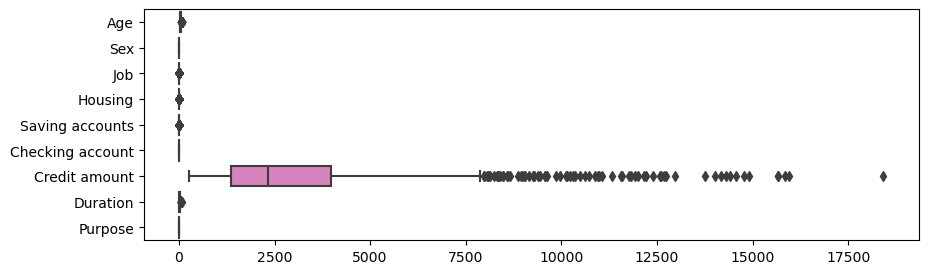

In [10]:
plt.figure(figsize=(10,3))
sns.boxplot(data=data, orient='h');

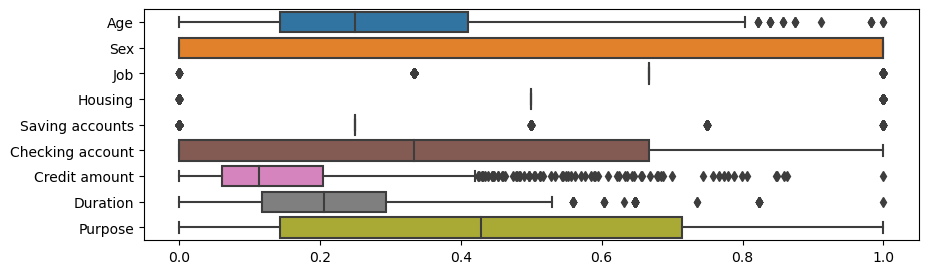

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(X_scaled, columns=data.columns)
plt.figure(figsize=(10,3))
sns.boxplot(data=data_scaled, orient='h');

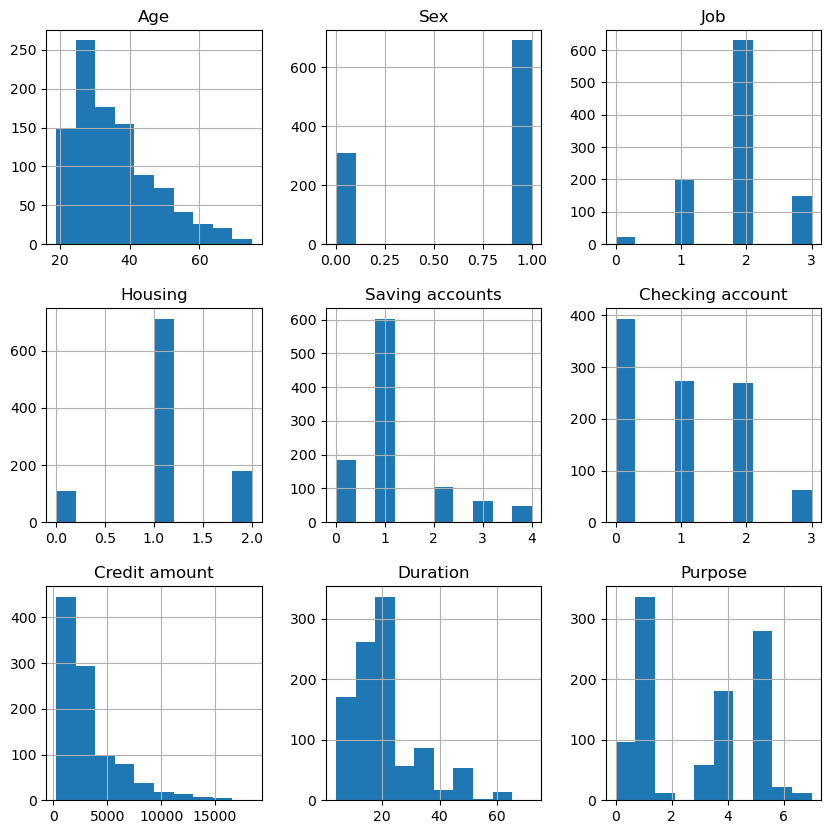

In [12]:
data.hist(figsize=(10,10));

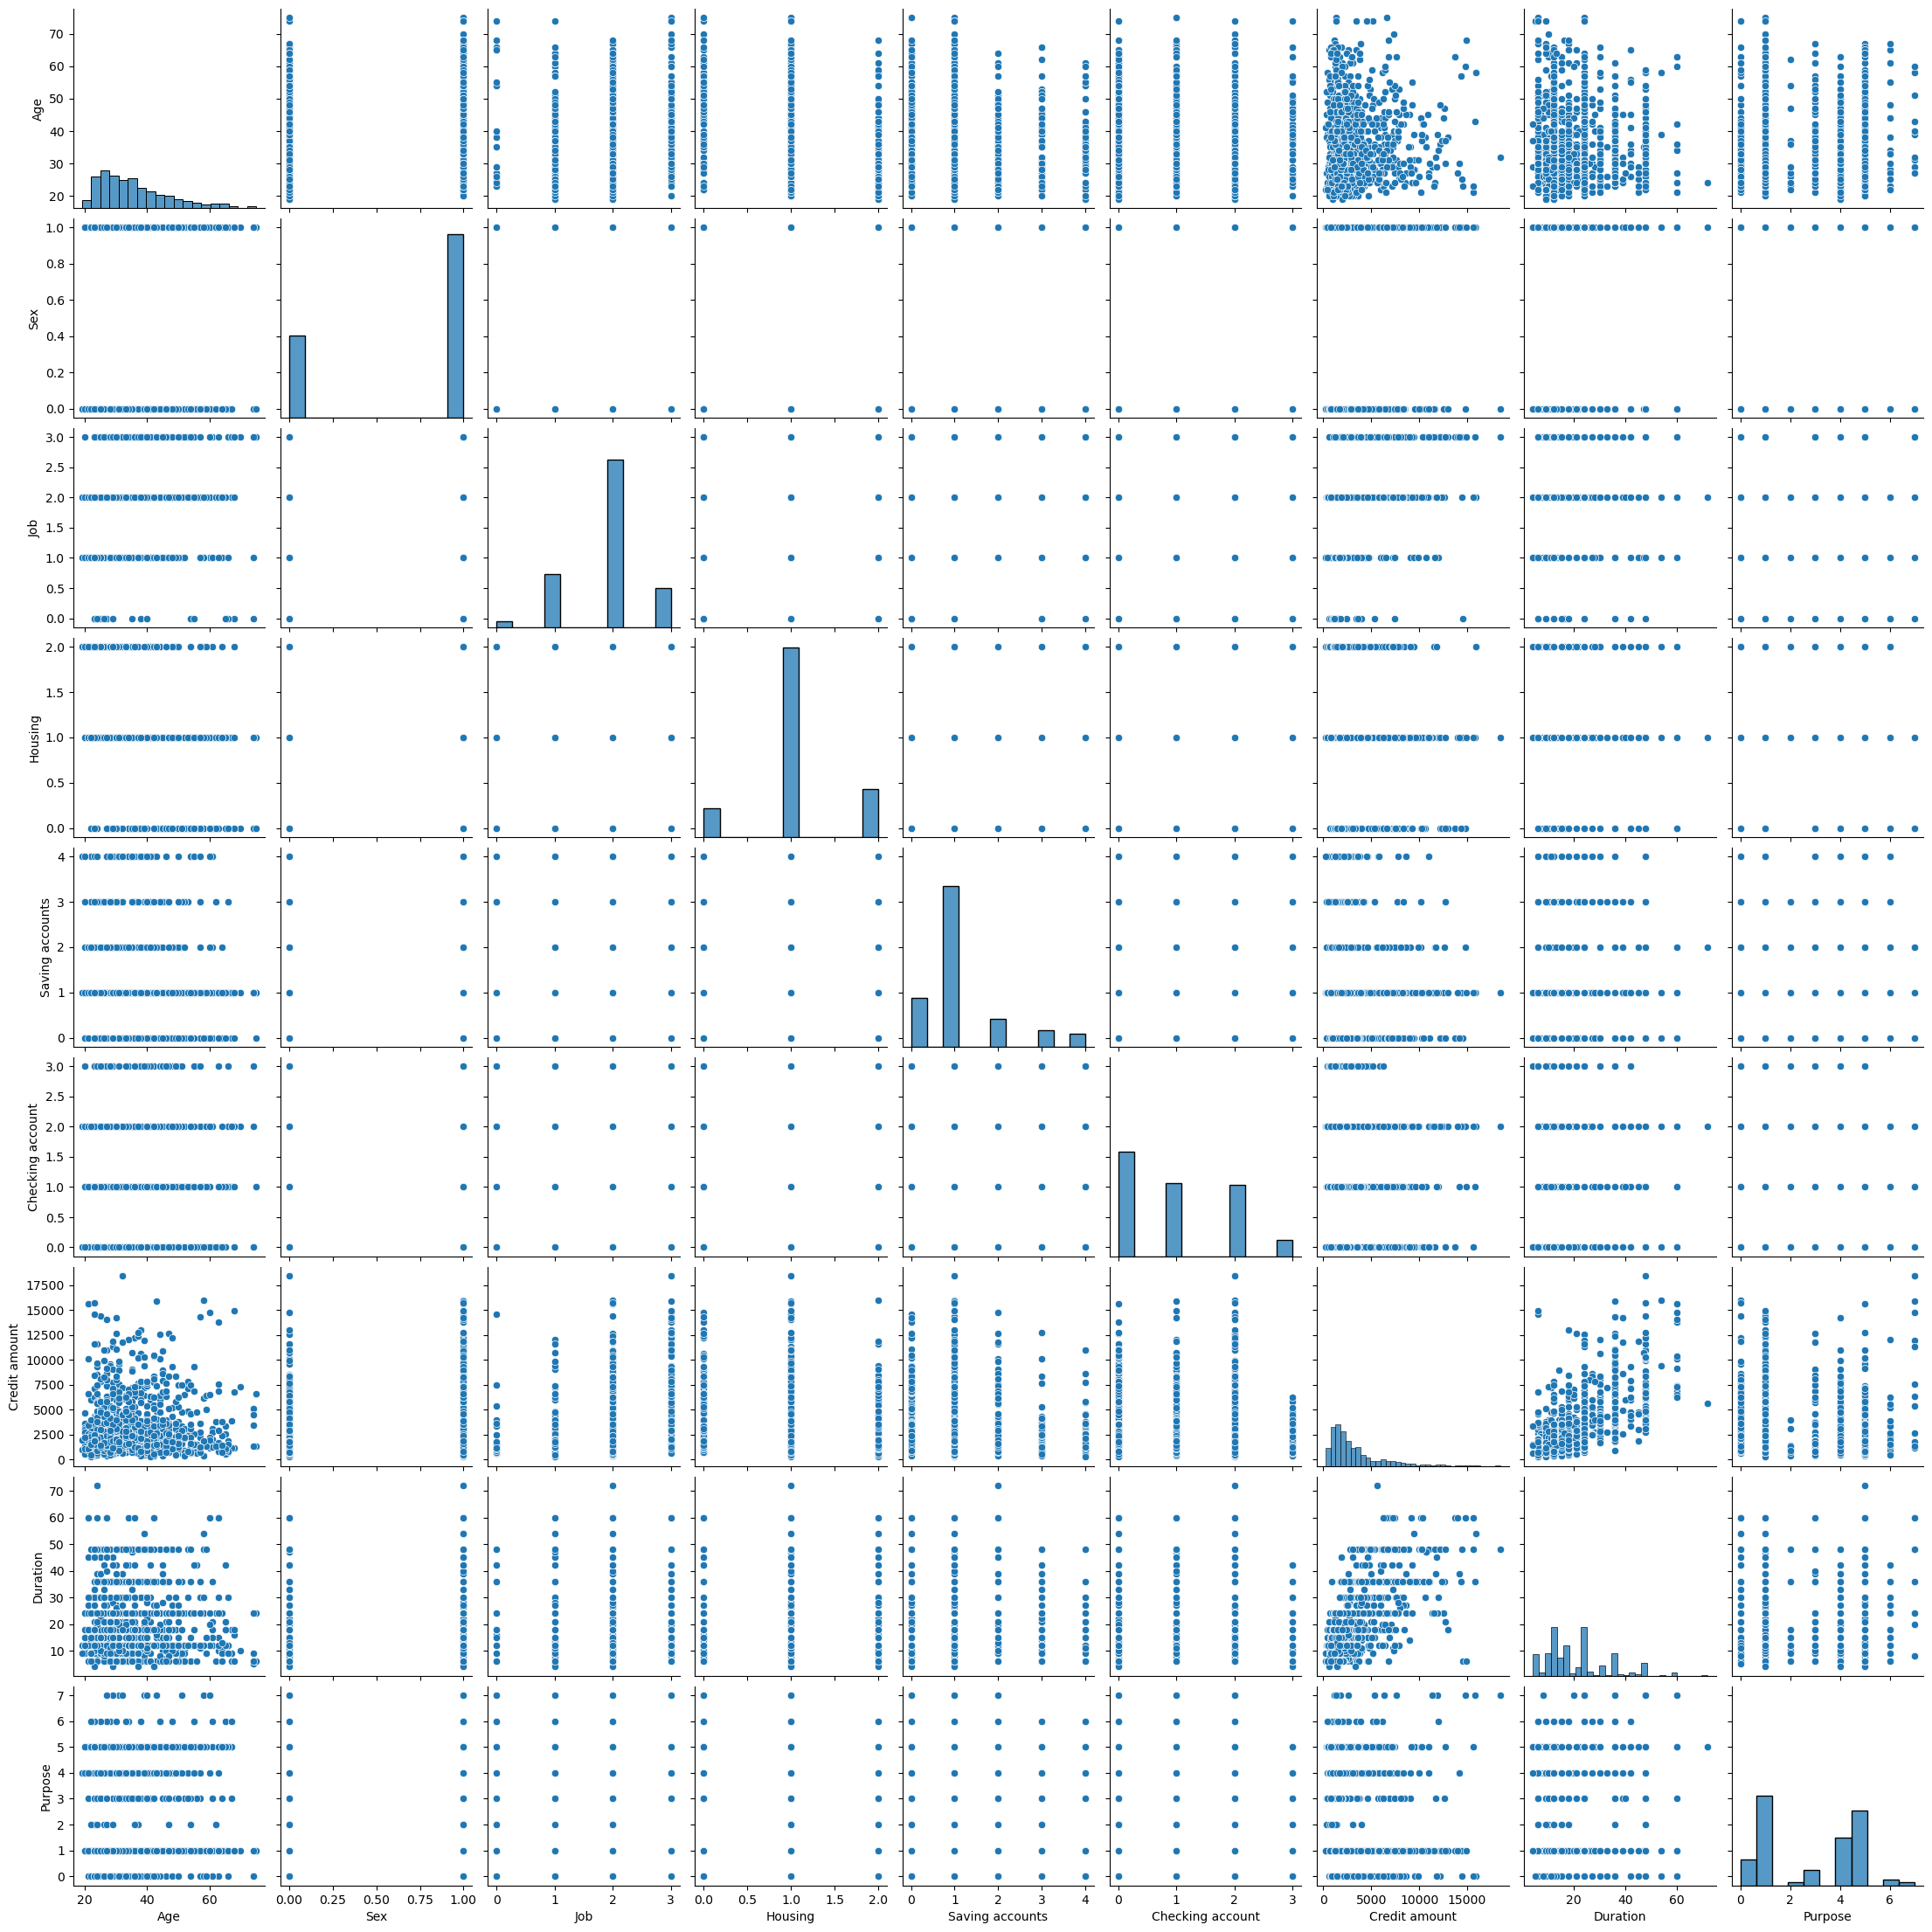

In [13]:
sns.pairplot(data);

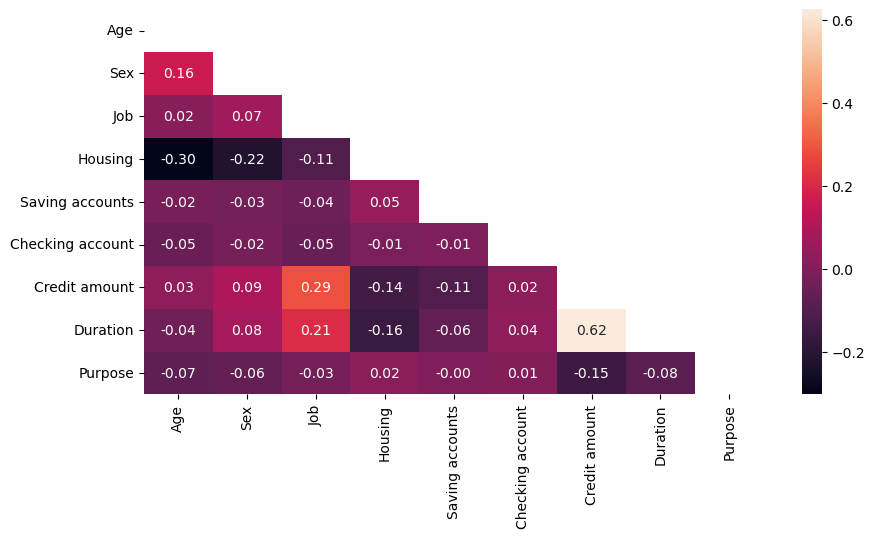

In [14]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,5))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f');

# tSNE & UMAP

In [15]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=10)
X_tsne = tsne.fit_transform(X_scaled)

print(X_scaled.shape)
print(X_tsne.shape)

(1000, 9)
(1000, 2)


In [16]:
#!pip install umap-learn

In [17]:
import umap

reducer = umap.UMAP()
X_umap = reducer.fit_transform(X_scaled)

print(X_scaled.shape)
print(X_umap.shape)

/Users/al/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(1000, 9)
(1000, 2)


<Axes: >

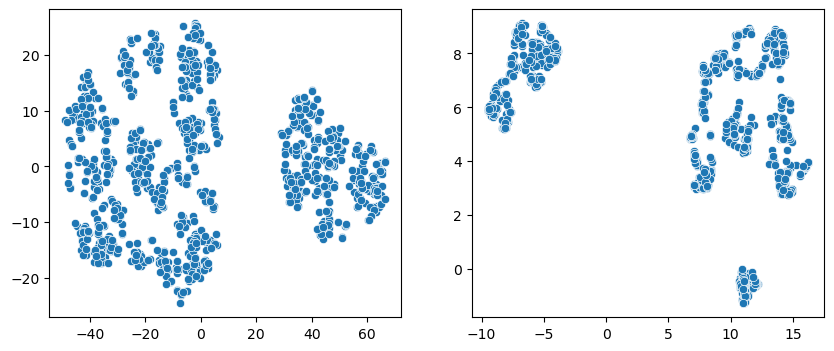

In [18]:
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], ax=axs[0])
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], ax=axs[1])

# KMeans

/Users/al/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/al/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/al/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/al/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/al/anaconda3/lib/python3.

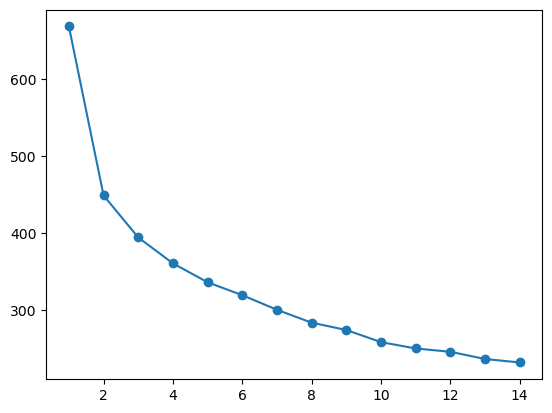

In [19]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=10).fit(X_scaled)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

plt.plot(range(1,15), inertia, marker='o');

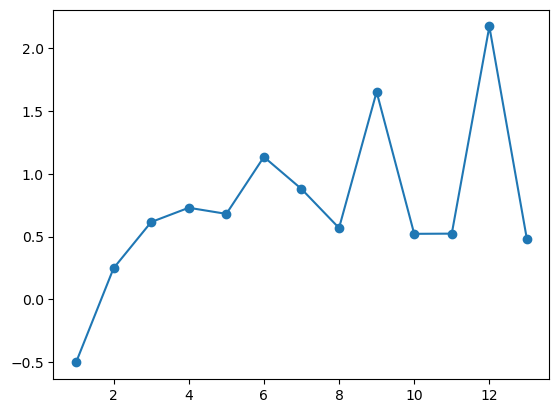

In [20]:
D = []
for i in range(0,13):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

plt.plot(range(1,14), D, marker='o');

In [21]:
kmeans = KMeans(n_clusters=8, random_state=10).fit(X_scaled)
labels_kmeans = kmeans.labels_

/Users/al/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

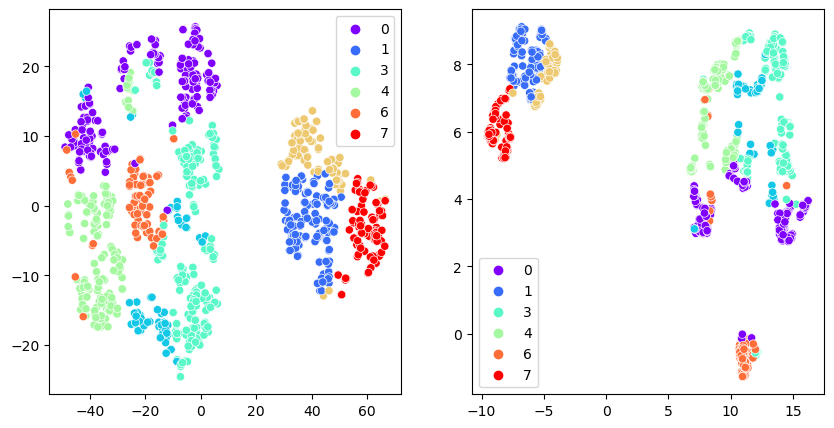

In [22]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels_kmeans, palette='rainbow', ax=axs[0])
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=labels_kmeans, palette='rainbow', ax=axs[1])

In [23]:
data['labels'] = labels_kmeans
data['labels'].value_counts(normalize=True).sort_index()

0    0.188
1    0.136
2    0.065
3    0.198
4    0.162
5    0.082
6    0.077
7    0.092
Name: labels, dtype: float64

In [24]:
data.groupby('labels').median().T.round(2)

labels,0,1,2,3,4,5,6,7
Age,31.0,31.0,36.0,34.0,36.0,31.0,42.0,24.0
Sex,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
Job,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Housing,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0
Saving accounts,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0
Checking account,2.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0
Credit amount,2321.0,1781.5,2333.0,2122.0,2787.0,2125.5,6331.0,2139.0
Duration,18.0,16.5,18.0,18.0,18.0,18.0,36.0,18.0
Purpose,4.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0


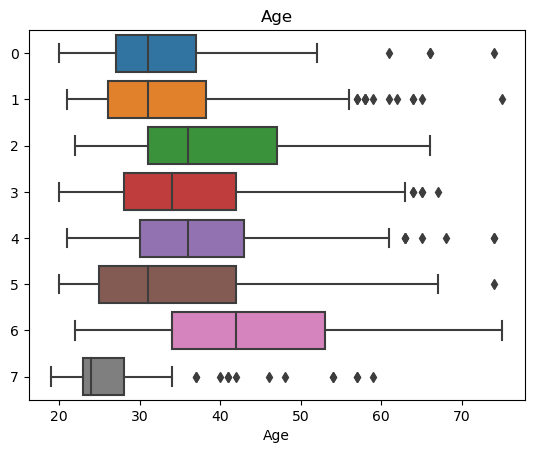

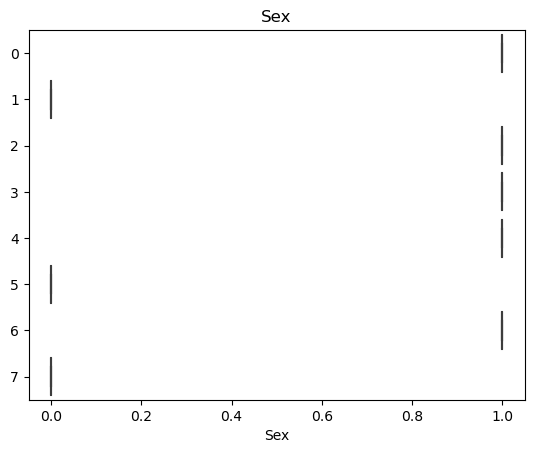

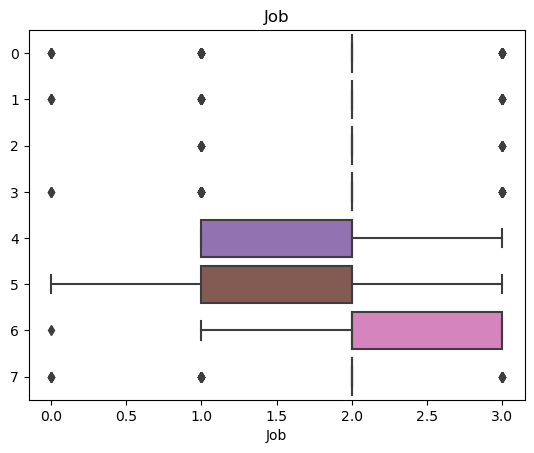

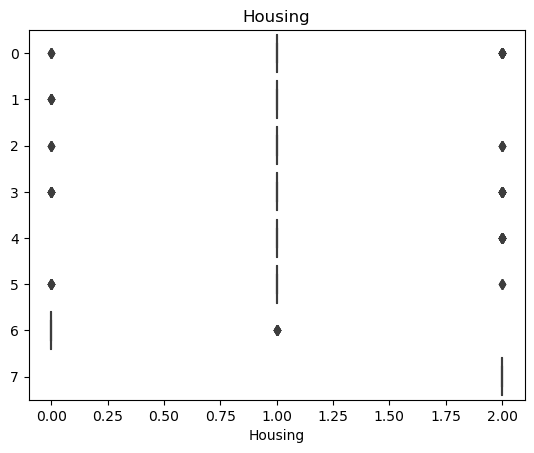

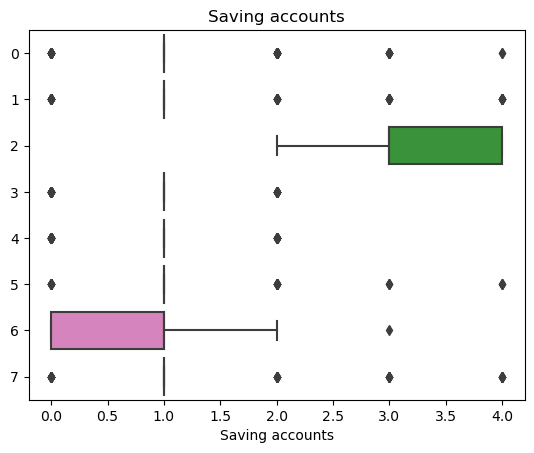

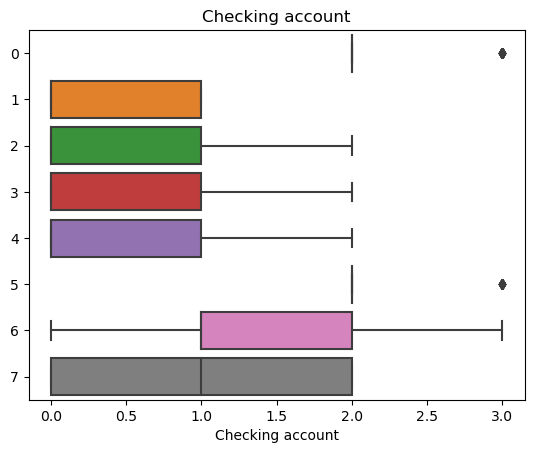

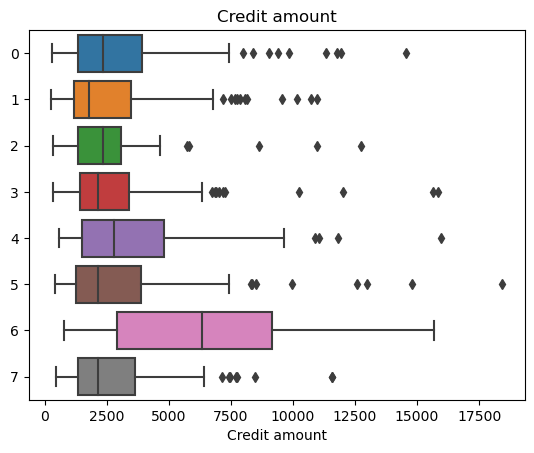

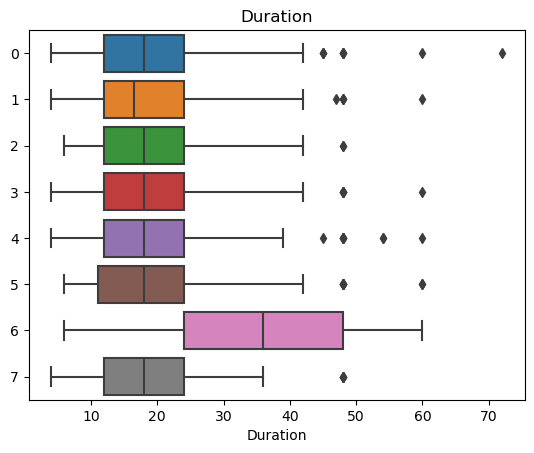

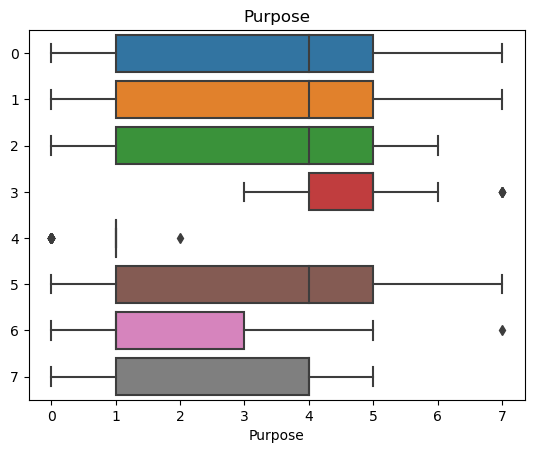

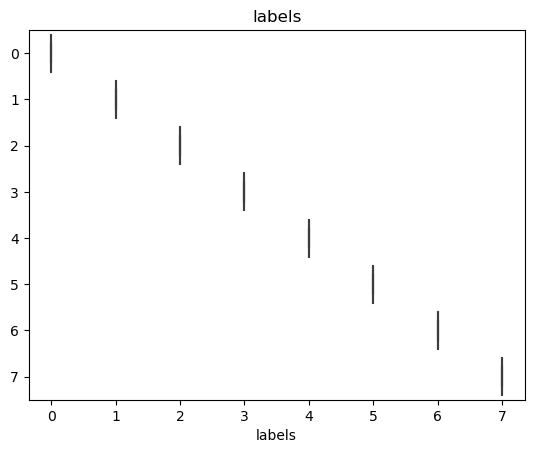

In [25]:
for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels_kmeans, orient='h')
    plt.title(col)
    plt.show();

# AgglomerativeClustering

In [26]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

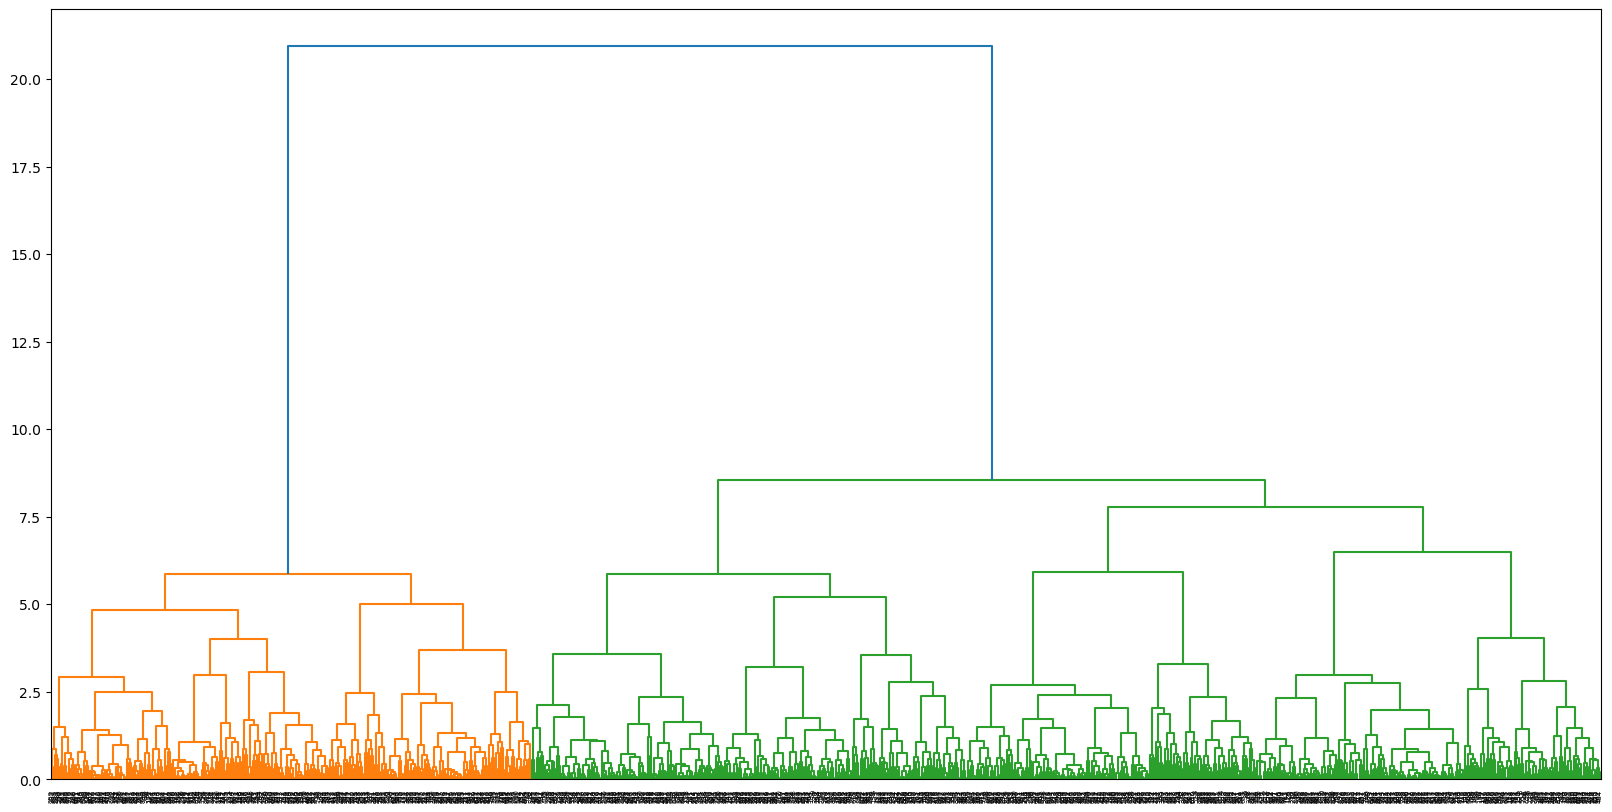

In [27]:
plt.figure(figsize=(20,10))
linkage_ = linkage(X_scaled, method='ward')
dendrogram_ = dendrogram(linkage_)

100%|███████████████████████████████████████████| 28/28 [00:00<00:00, 41.19it/s]


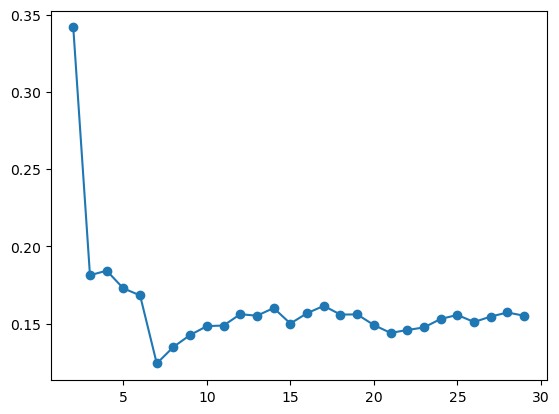

In [28]:
silhouette = []
for i in tqdm(range(2,30)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_scaled)
    labels = agg.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)
    
plt.plot(range(2,30), silhouette, marker='o');

In [29]:
agg = AgglomerativeClustering(n_clusters=7).fit(X_scaled)
labels_agg = agg.labels_

<Axes: >

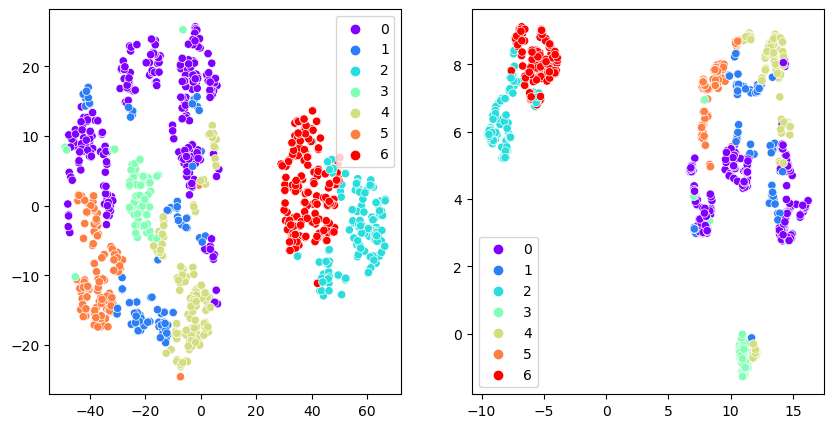

In [30]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels_agg, palette='rainbow', ax=axs[0])
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=labels_agg, palette='rainbow', ax=axs[1])

In [31]:
data['labels'] = labels_agg
data['labels'].value_counts(normalize=True)

0    0.281
6    0.180
4    0.135
2    0.130
5    0.118
1    0.088
3    0.068
Name: labels, dtype: float64

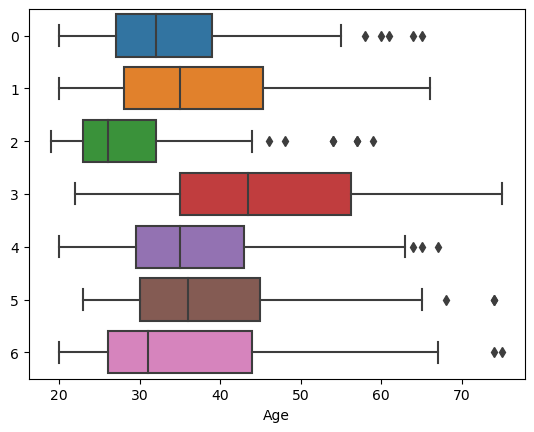

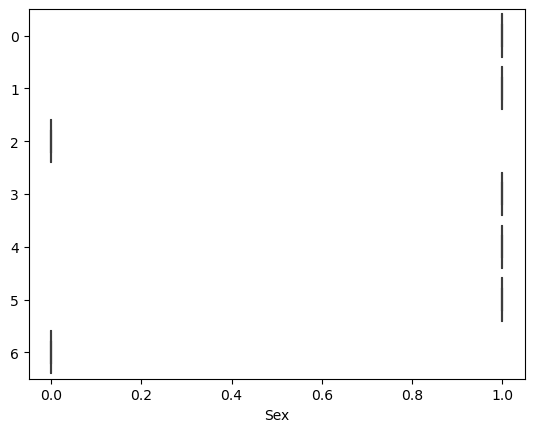

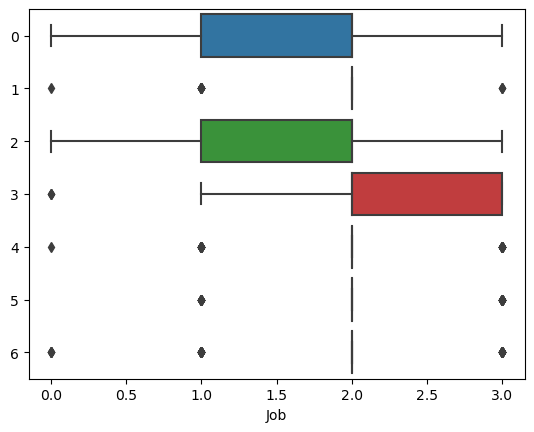

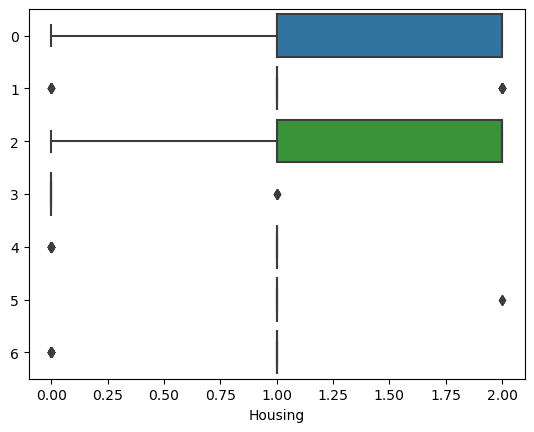

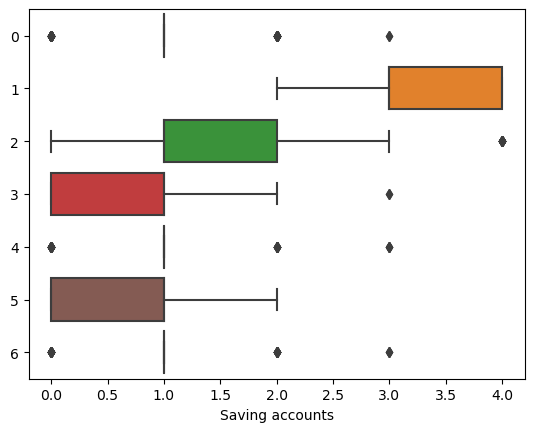

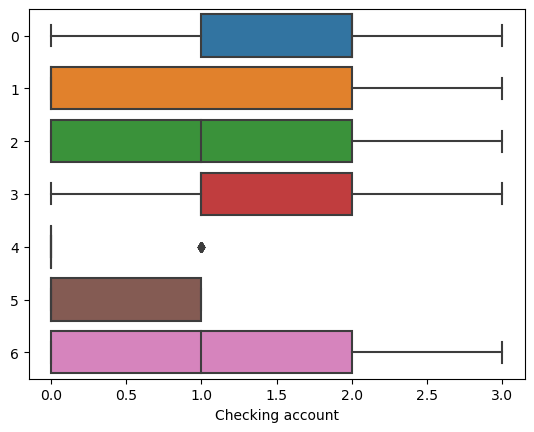

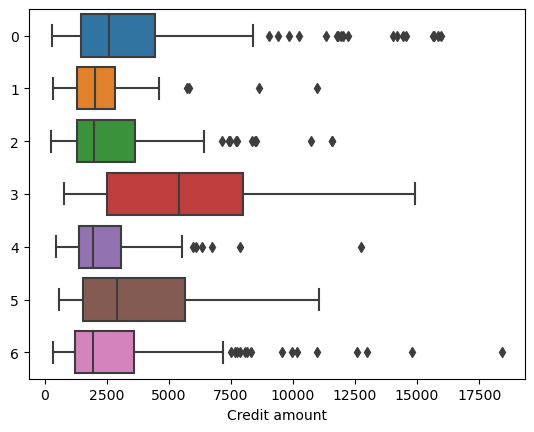

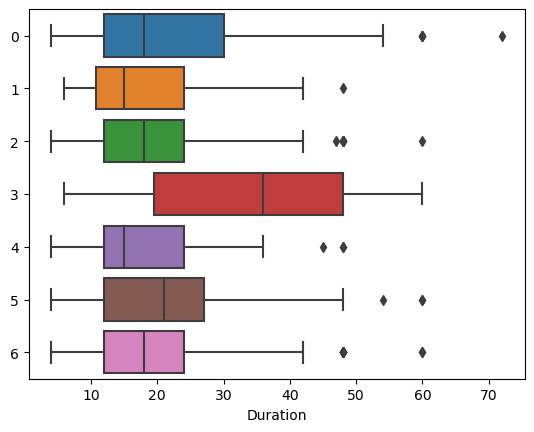

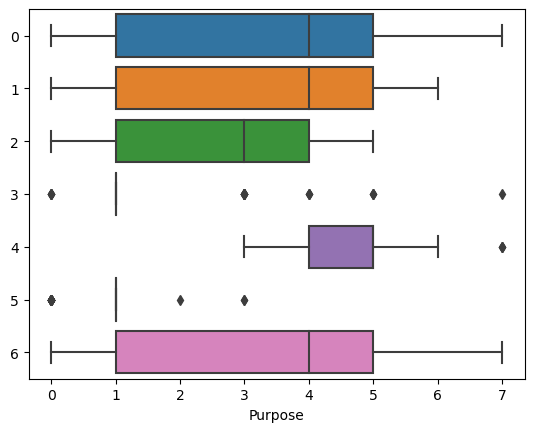

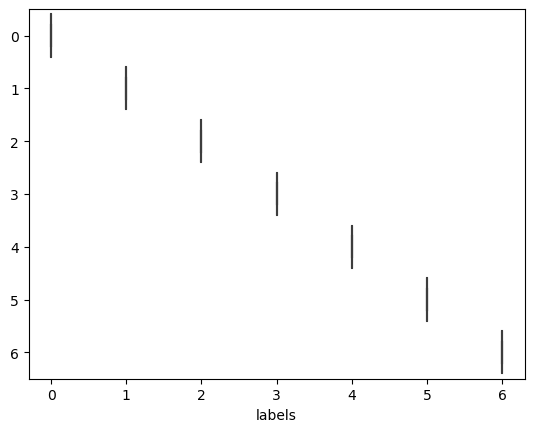

In [32]:

for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels_agg, orient='h')
    plt.show();

In [33]:
data.groupby('labels').median().T.round(2)

labels,0,1,2,3,4,5,6
Age,32.0,35.0,26.0,43.5,35.0,36.0,31.0
Sex,1.0,1.0,0.0,1.0,1.0,1.0,0.0
Job,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Housing,1.0,1.0,2.0,0.0,1.0,1.0,1.0
Saving accounts,1.0,3.0,1.0,1.0,1.0,1.0,1.0
Checking account,2.0,0.0,1.0,1.0,0.0,0.0,1.0
Credit amount,2577.0,2010.5,1972.5,5397.5,1940.0,2891.5,1950.0
Duration,18.0,15.0,18.0,36.0,15.0,21.0,18.0
Purpose,4.0,4.0,3.0,1.0,5.0,1.0,4.0


# DBSCAN

In [34]:
def dbscan_clustering(eps_range, X):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(X)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(X, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)
        
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

100%|███████████████████████████████████████████| 90/90 [00:02<00:00, 32.19it/s]


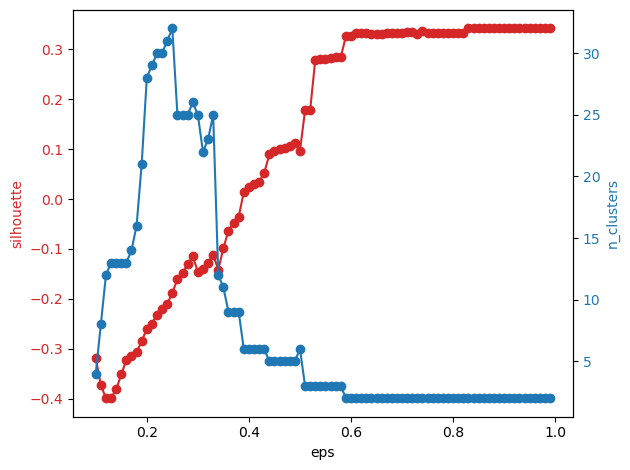

In [35]:
eps_range = np.arange(0.1,1,0.01)
dbscan_clustering(eps_range, X_scaled)

In [36]:
from sklearn.neighbors import NearestNeighbors

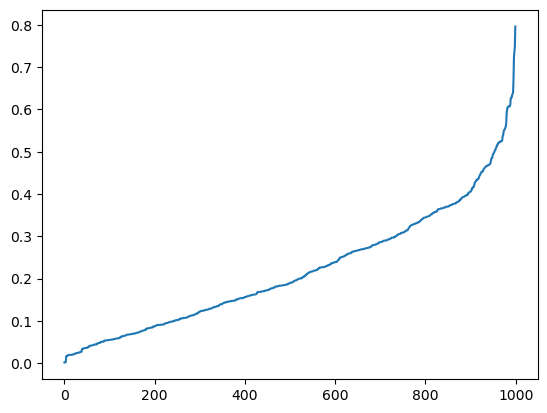

In [37]:
neighbors = NearestNeighbors(n_neighbors=5)
nbrs = neighbors.fit(X_scaled)
distance, indices = nbrs.kneighbors(X_scaled)

distance = np.sort(distance, axis=0)
distance = distance[:,1]
plt.plot(distance)

In [38]:
dbscan = DBSCAN(eps=0.5).fit(X_scaled)
labels_dbscan = dbscan.labels_

<Axes: >

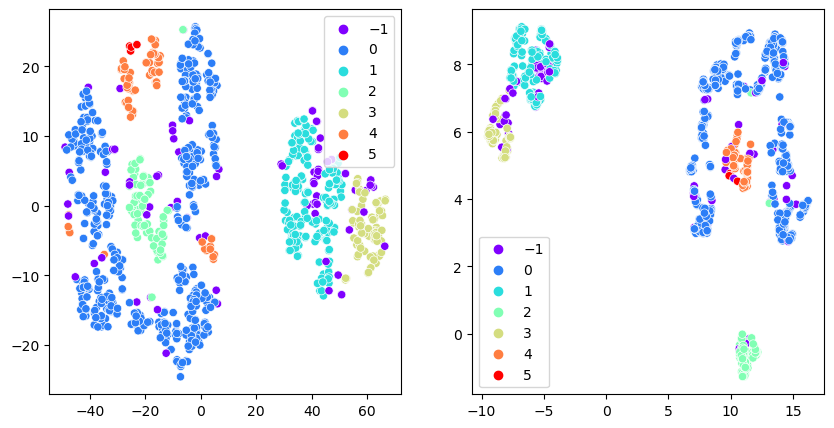

In [39]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels_dbscan, palette='rainbow', ax=axs[0])
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=labels_dbscan, palette='rainbow', ax=axs[1])

In [40]:
data['labels'] = labels_dbscan
data['labels'].value_counts(normalize=True)

 0    0.500
 1    0.187
 3    0.082
-1    0.081
 2    0.076
 4    0.069
 5    0.005
Name: labels, dtype: float64

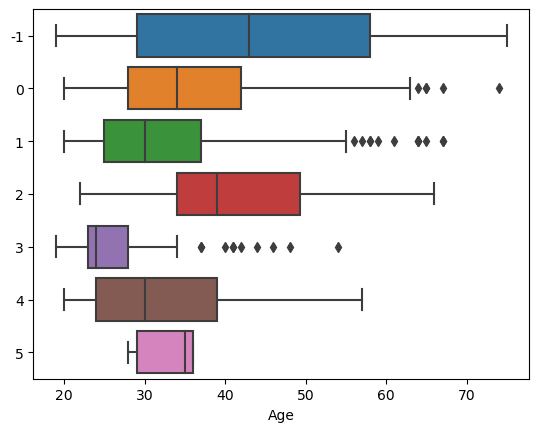

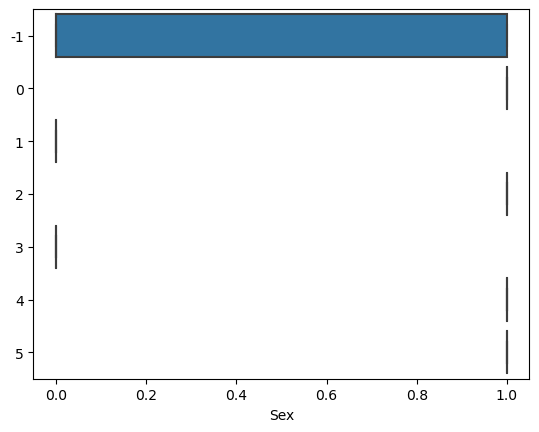

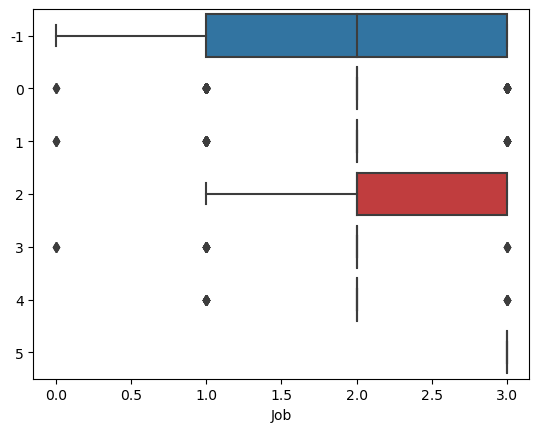

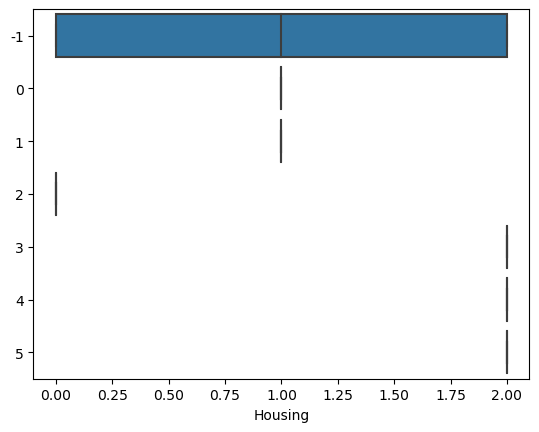

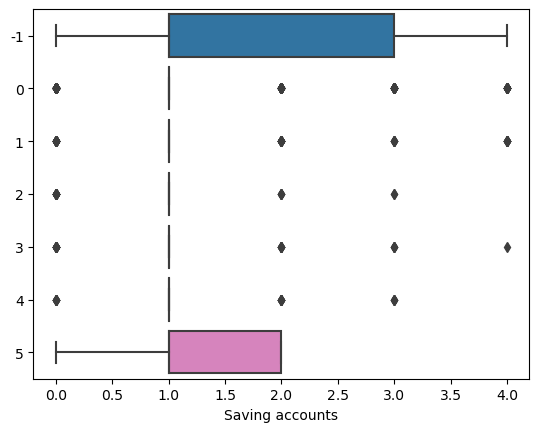

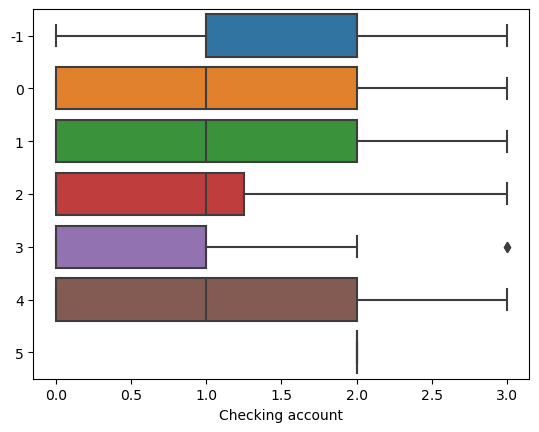

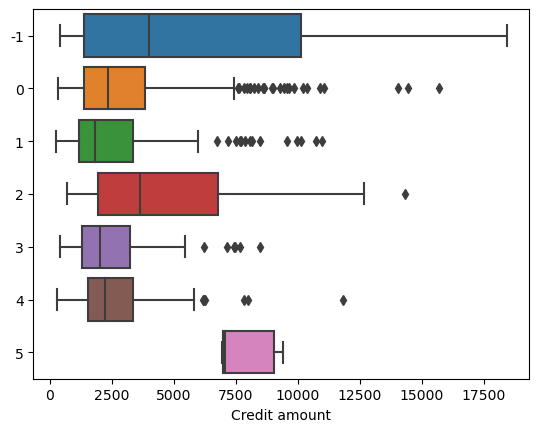

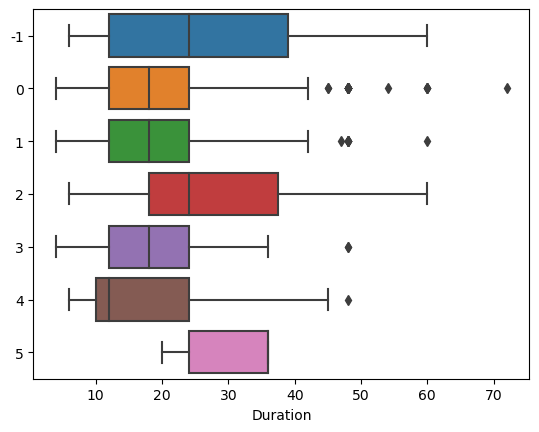

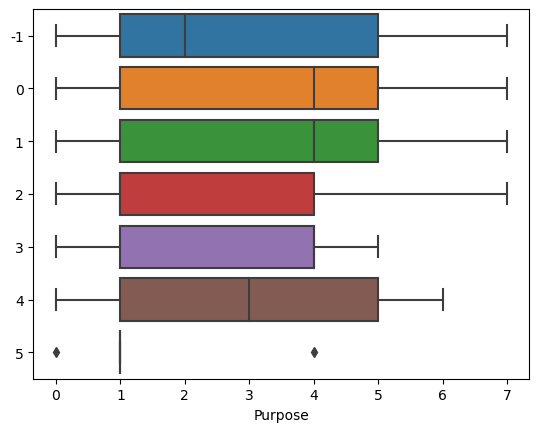

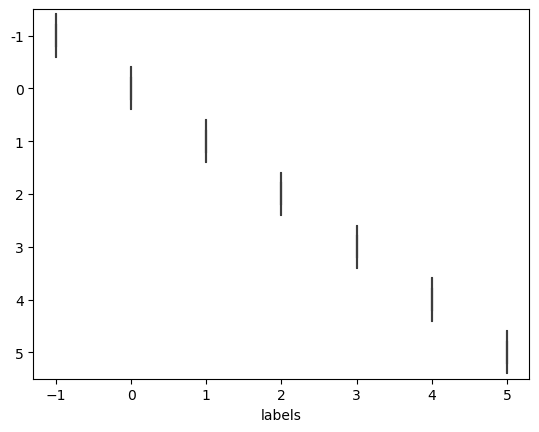

In [41]:
for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels_dbscan, orient='h')
    plt.show();

In [42]:
data.groupby('labels').median().T.round(2)

labels,-1,0,1,2,3,4,5
Age,43.0,34.0,30.0,39.0,24.0,30.0,35.0
Sex,0.0,1.0,0.0,1.0,0.0,1.0,1.0
Job,2.0,2.0,2.0,2.0,2.0,2.0,3.0
Housing,1.0,1.0,1.0,0.0,2.0,2.0,2.0
Saving accounts,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Checking account,2.0,1.0,1.0,1.0,1.0,1.0,2.0
Credit amount,3990.0,2328.5,1817.0,3615.0,2009.5,2235.0,7057.0
Duration,24.0,18.0,18.0,24.0,18.0,12.0,36.0
Purpose,2.0,4.0,4.0,1.0,4.0,3.0,1.0


# Conclusions

1 Все алгоритмы выделили сходное количество кластеров (6 .. 7)

2 При этом DBSCAN отнес 18% данных к шуму, что довольно много

3 Топологии кластров у kmean и AgglomerativeClustering довольно близки

Для анализа возьмем AgglomerativeClustering:
- Данные разделяются по полу: "женские" кластера 2 и 6 образуют отдельную группу точек на графиках tsne/umap
- 0 кластер относительно слабо дифференцирован по какому-либо параметру
- 1 кластер скорее включает относительно состоятельныых мужчин, при это с небольшой суммой займа. Вероятно это достаточно надежные звемщики
- 2 кластер включет молодых женщин с фокуссом на образование. При этом странно, что срок займа не превышает среднего значения
- 3 кластер содержит высококвалифицированных папиков, которые берут относительно крупные и долгие займы на покупку машины
- 4 кластер ориентирован на ремонт и технику
- 5 кластер также ориентирован на покупку машин, но содержит более молодых заемщиков и меньший срок и размер займа
- 6 кластер схож с 0 клстером, но ориентирован на женщин

